**Importing Python Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

**importing the csv files**

In [ ]:
data = pd.read_csv('/content/Hyderabad.csv')
data.head()
data.shape

(2518, 40)

In [ ]:
y = data['Price']

x = data[['Area']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Create a Linear Regression model and train them**

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

**Make predictions on the test set**

In [ ]:
y_pred = model.predict(X_test)

**Evaluate the model**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 19353791538469.54
R-squared: 0.69303085564613


**Plot the regression line**

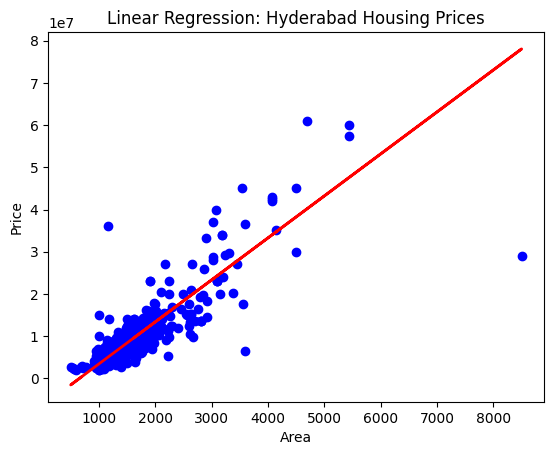

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression: Hyderabad Housing Prices')
plt.show()

**Residual plot**

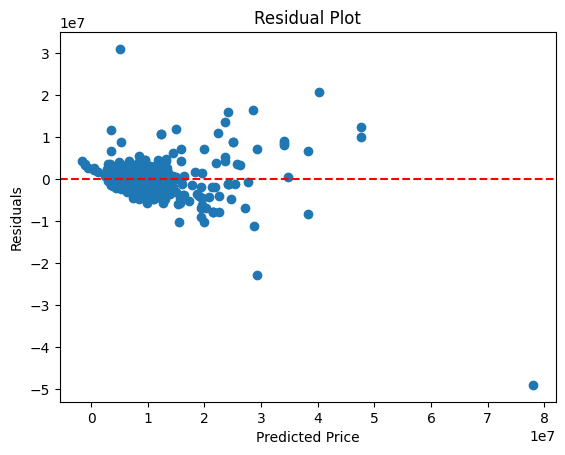

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

**Distribution of residuals**

<ipython-input-42-5d189efe4197>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


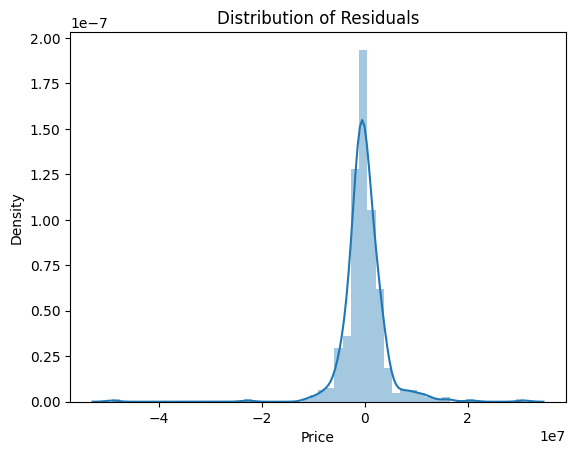

In [ ]:
sns.distplot(residuals)
plt.title('Distribution of Residuals')
plt.show()


**function for Gradient Descent optimizer**

In [ ]:
import numpy as np
def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):

  n_samples, n_features = X.shape
  weights = np.zeros(n_features)
  bias = 0

  for _ in range(num_iterations):
    y_predicted = np.dot(X, weights) + bias
    dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
    db = (1 / n_samples) * np.sum(y_predicted - y)

    weights -= learning_rate * dw
    bias -= learning_rate * db

  return weights, bias

**Visualize the original random data points as a scatter plot.**

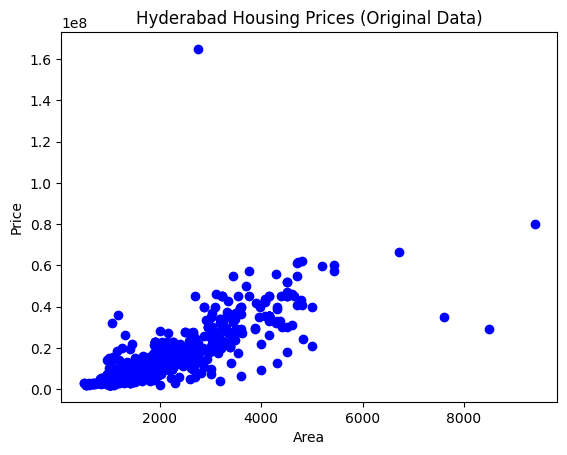

In [ ]:

import matplotlib.pyplot as plt
plt.scatter(x, y, color='blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Hyderabad Housing Prices (Original Data)')
plt.show()


**The best-fit line obtained using your Linear Regression model**

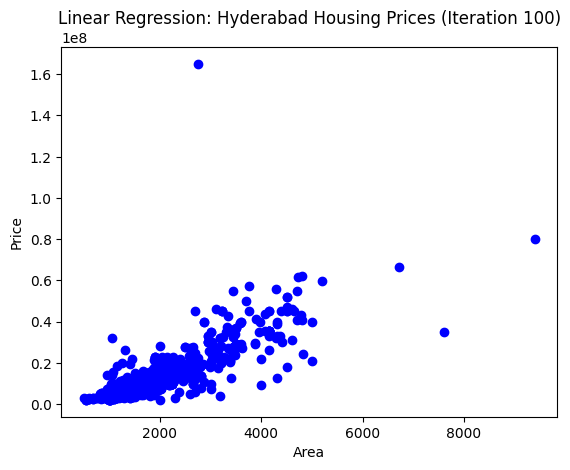

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

def gradient_descent(X, y, learning_rate=0.01, num_iterations=100):
  n_samples, n_features = X.shape
  weights = np.zeros(n_features)
  bias = 0

  for i in range(num_iterations):
    y_predicted = np.dot(X, weights) + bias
    dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
    db = (1 / n_samples) * np.sum(y_predicted - y)

    weights -= learning_rate * dw
    bias -= learning_rate * db

    clear_output(wait=True)
    plt.scatter(X, y, color='blue')
    plt.plot(X, y_predicted, color='red', linewidth=2)
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.title(f'Linear Regression: Hyderabad Housing Prices (Iteration {i+1})')
    plt.show()
    plt.pause(0.1)

  return weights, bias

weights, bias = gradient_descent(X_train, y_train)


**cost function J(w) for different values of w**

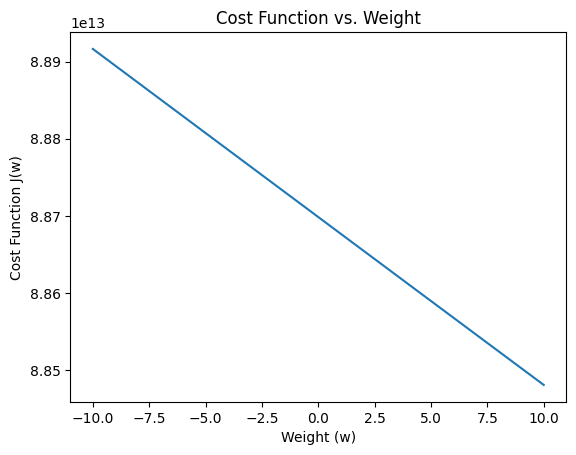

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def cost_function(X, y, weights, bias):
  """Calculates the cost function (Mean Squared Error) for given weights and bias."""
  y_predicted = np.dot(X, weights) + bias
  cost = (1 / (2 * len(y))) * np.sum((y_predicted - y) ** 2)
  return cost


weight_values = np.linspace(-10, 10, 100)
cost_values = []

for weight in weight_values:
  bias = 0
  weights = np.array([weight])
  cost = cost_function(X_train, y_train, weights, bias)
  cost_values.append(cost)


# Plot the cost function
plt.plot(weight_values, cost_values)
plt.xlabel('Weight (w)')
plt.ylabel('Cost Function J(w)')
plt.title('Cost Function vs. Weight')
plt.show()